In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def import_data_from_file(filename):
    """
    Import financial data from a text file into a pandas DataFrame.
    
    Args:
        filename (str): Path to the text file containing the data
        
    Returns:
        pandas.DataFrame: DataFrame containing the imported data
    """
    # Read the data from the file, using whitespace as delimiter
    # Skip the header row (row 0) and use our own column names
    df = pd.read_csv(filename, 
                     engine='python',
                     sep=r'\t',  # Use tab as delimiter
                     #delim_whitespace=True, 
                     skiprows=1,
                     names=['date', 'ouv', 'haut', 'bas', 'clot', 'vol', 'devise'])

    # Convert date column to datetime format
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
        
    # Convert numeric columns to appropriate types
    numeric_cols = ['ouv', 'haut', 'bas', 'clot', 'vol']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
    
    return df

def plot_prices(df, bounds=False):
    """
    Plot the opening prices over time.
    
    Args:
        df (pandas.DataFrame): DataFrame containing the financial data
    """
    plt.figure(figsize=(12, 8))
    #plt.plot(df['date'], df['ouv'], linestyle='-', color='b', label='Opening Price')
    plt.plot(df['date'], df['clot'], linestyle='-', color='r', label='Closing Price')
    if bounds:
        plt.plot(df['date'], df['haut'], linestyle=':', color='g', label='High Price')
        plt.plot(df['date'], df['bas'], linestyle=':', color='y', label='Low Price')
    
    plt.title(f'Closing Prices Over Time {span}', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (VND)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Format x-axis to show dates nicely
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m/%Y'))
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()


Data imported successfully:

DataFrame info:


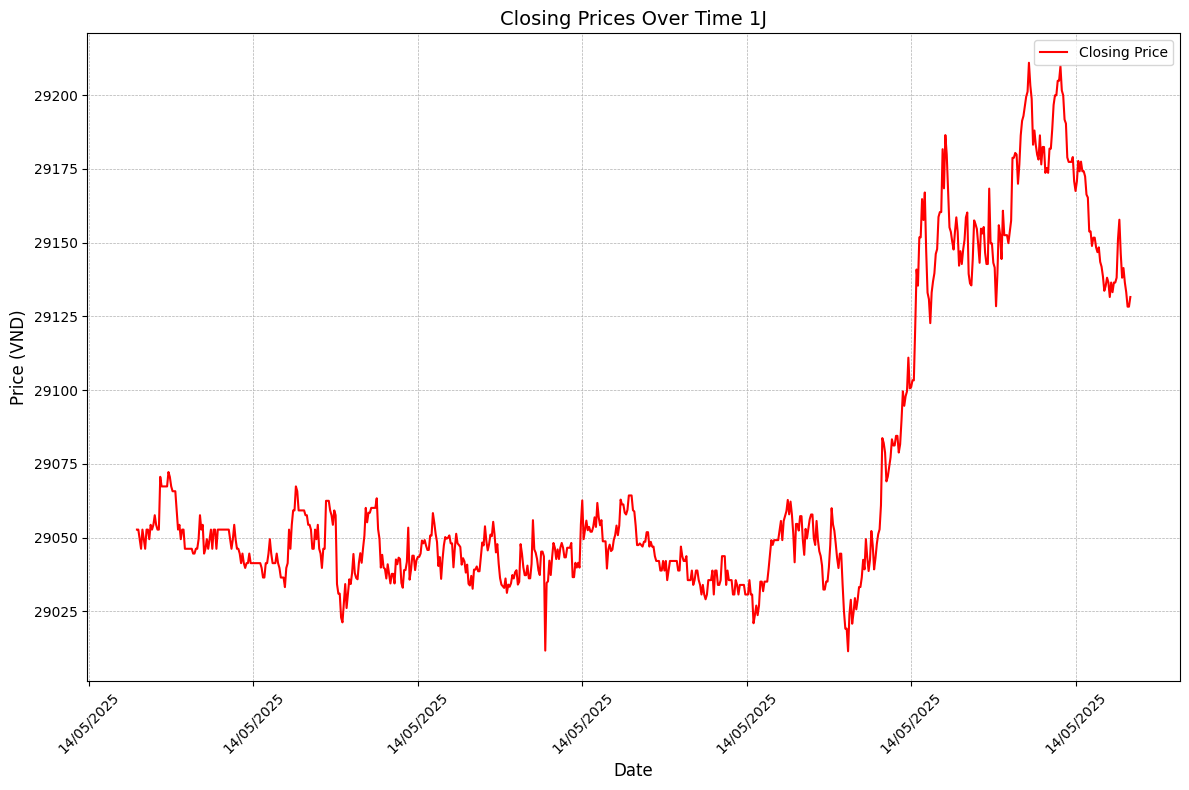

In [37]:
span = '1J'  # Change this to the desired span (1J, 5J, 1M, 3M, 6M, 1A, 5A, 10A)

# Example usage
if __name__ == "__main__":
    # Replace 'data.txt' with your actual file path
    filename = fr'C:/Users/jeand/Downloads/EURVNDSPOT_2025-05-14 ({span}).txt'
    
    try:
        data = import_data_from_file(filename)
        print("Data imported successfully:")
        #print(data.head())
        
        # Optional: Display DataFrame info
        print("\nDataFrame info:")
        #print(data.info())

        # Plot the opening prices
        plot_prices(data)
        
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
    data